In [209]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

TEST_TIMEOUT = 60

In [248]:
df = pd.read_csv("packet_size.csv", header=0)

# take the average values for each switch x packet size 
avg_df = df.groupby(['switch used ', 'packet size']).mean()

# # dont need trial no. anymore 
avg_df = avg_df.drop('trial no. ', axis=1)

avg_df = avg_df.reset_index()

# set messages/sec to be messages sent / TEST TIMEOUT 
avg_df['messages/sec'] = avg_df['no. messages ^'] / TEST_TIMEOUT

avg_df = avg_df.rename(columns={"messages/sec": "messages per second", 
                                "send, probe data interval (usec, rate: 100mBits/sec)":"send, probe data interval (usec)"
                               })

In [249]:
avg_df

switch used   packet size  total test time (s)   no. messages ^  \
0          ovs          20.0            119.206667    1.874913e+07   
1          ovs          64.0            107.510000    1.251421e+07   
2          ovs         100.0             94.543333    8.507180e+06   
3          ovs         500.0             76.859157    1.564908e+06   
4          ovs        1000.0             75.673824    7.830997e+05   
5          ovs        1500.0             74.722738    5.222177e+05   
6      ovs-dpdk         20.0            119.020000    1.774598e+07   
7      ovs-dpdk         64.0            105.543333    1.412827e+07   
8      ovs-dpdk        100.0             86.603333    8.461836e+06   
9      ovs-dpdk        500.0             67.673333    1.562495e+06   
10     ovs-dpdk       1000.0             63.826667    7.833313e+05   
11     ovs-dpdk       1500.0             61.526667    5.221637e+05   

    messages per second  send, probe data interval (usec)  \
0         312485.455556                               1.0   
1         208570.238889                               4.0   
2         141786.327778                               7.0   
3          26081.800000                              38.0   
4          13051.661111                              76.0   
5           8703.627778                             114.0   
6         295766.377778                               1.0   
7         235471.094444                               4.0   
8         141030.594444                               7.0   
9          26041.583333                              38.0   
10         13055.522222                              76.0   
11          8702.727778                             114.0   

    avg send message time (s) *   
0                   4.843333e-07  
1                   3.436667e-06  
2                   6.716667e-06  
3                   3.793333e-05  
4                   7.556667e-05  
5                   1.130000e-04  
6                   4.139333e-07  
7                   3.943333e-06  
8                   6.670000e-06  
9                   3.743333e-05  
10                  7.550000e-05  
11                  1.140000e-04

In [250]:
# set log cols: 
LOG_COLS = ['no. messages ^', 
            'messages per second', 
            'send, probe data interval (usec)', 
            'avg send message time (s) * ']

for lc in LOG_COLS: 
    print(lc)
    avg_df[f'{lc}_log'] = np.log10(avg_df[f'{lc}']) 

no. messages ^
messages per second
send, probe data interval (usec)
avg send message time (s) * 


In [251]:
avg_df.head()

switch used   packet size  total test time (s)   no. messages ^  \
0         ovs          20.0            119.206667    1.874913e+07   
1         ovs          64.0            107.510000    1.251421e+07   
2         ovs         100.0             94.543333    8.507180e+06   
3         ovs         500.0             76.859157    1.564908e+06   
4         ovs        1000.0             75.673824    7.830997e+05   

   messages per second  send, probe data interval (usec)  \
0        312485.455556                               1.0   
1        208570.238889                               4.0   
2        141786.327778                               7.0   
3         26081.800000                              38.0   
4         13051.661111                              76.0   

   avg send message time (s) *   no. messages ^_log  messages per second_log  \
0                  4.843333e-07            7.272981                 5.494830   
1                  3.436667e-06            7.097404                 5.319252   
2                  6.716667e-06            6.929786                 5.151634   
3                  3.793333e-05            6.194489                 4.416338   
4                  7.556667e-05            5.893817                 4.115666   

   send, probe data interval (usec)_log  avg send message time (s) * _log  
0                              0.000000                         -6.314856  
1                              0.602060                         -5.463863  
2                              0.845098                         -5.172846  
3                              1.579784                         -4.420979  
4                              1.880814                         -4.121670

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


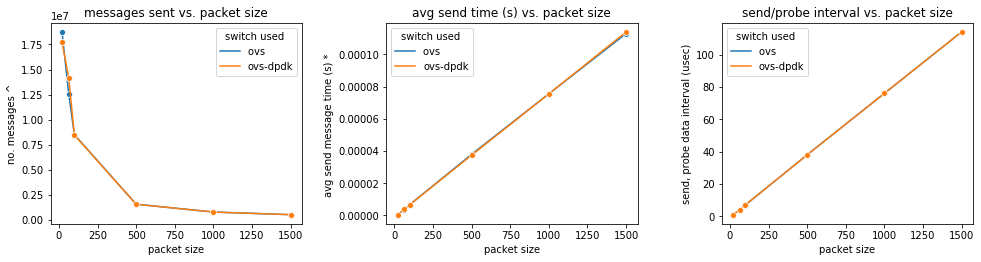

In [254]:
fig, ax = plt.subplots(1,3, figsize=(14,4))
messages_sec = sns.lineplot(
    data=avg_df, 
    y='no. messages ^',
    x="packet size",
    hue='switch used ',
    marker='o', 
    ax=ax[0],
    ci=None).set_title('messages sent vs. packet size')

avg_send_time = sns.lineplot(
    data=avg_df, 
    y='avg send message time (s) * ',
    x="packet size",
    hue='switch used ',
    marker='o',
    ax=ax[1],
    ci=None).set_title('avg send time (s) vs. packet size')

interval = sns.lineplot(
    data=avg_df, 
    y='send, probe data interval (usec)',
    x="packet size",
    hue='switch used ',
    marker='o',
    ax=ax[2],
    ci=None).set_title('send/probe interval vs. packet size')

fig.tight_layout(pad=2.0)
fig.show()

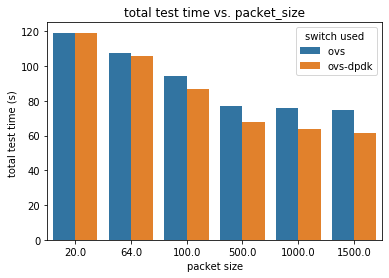

In [185]:
plt = sns.barplot(
    data=avg_df, 
    y='total test time (s) ',
    x="packet size",
    hue='switch used ').set_title('total test time vs. packet_size')

In [245]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help